In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

# Tunable parameters

In [2]:
!python ./lbm.py --help

usage: lbm.py [-h] [--case CASE] [--omega OMEGA] [--force FORCE]
              [--u_imposed U_IMPOSED] [--wx WX] [--nt NT]

optional arguments:
  -h, --help            show this help message and exit
  --case CASE           boundary condition type (1=periodic, 2=imposed)
  --omega OMEGA         relaxation parameter, between [0, 2]
  --force FORCE         external forcing in x direction
  --u_imposed U_IMPOSED
                        imposed velocity at boundaries (needs case==2)
  --wx WX               width of the narrowing in region, between [0, 60]
  --nt NT               total number of time steps


# Default configuration

## Case 1: periodic boundary

### Run simulation 1

In [3]:
!python ./lbm.py --case 1 --nt 8000

Arguments: Namespace(case=1, force=1e-08, nt=8000, omega=1.0, u_imposed=2.777777777777778e-05, wx=30)
Important parameters:
Boundary type: 1
Time steps: 8000
Narrowing width w: 30
Forcing: 1e-08
Lelaxation omega: 1.0
viscosity:  0.16666666666666666

running solver... 

writing to file: lbm_bc1_w30_omega1.0_force1e-08_nt8000.nc


###  Read result 1

In [4]:
ds_case1 = xr.open_dataset('lbm_bc1_w30_omega1.0_force1e-08_nt8000.nc')
ds_case1

<xarray.Dataset>
Dimensions:  (x: 200, y: 60)
Coordinates:
  * x        (x) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 ...
  * y        (y) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 ...
Data variables:
    ux       (y, x) float64 ...
    uy       (y, x) float64 ...
    rho      (y, x) float64 ...
    p        (y, x) float64 ...

In [5]:
# Reynolds number requires ux(x=0) ~ 2.8e-5
ds_case1['ux'].isel(x=0).mean()

<xarray.DataArray 'ux' ()>
array(2.99636e-05)
Coordinates:
    x        float64 1.0

### Plot 2D fields 1

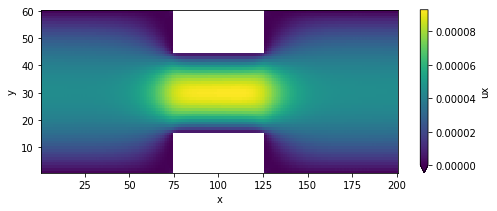

In [6]:
# steady state velocity
fig, ax = plt.subplots(1, 1, figsize=[8, 3])
ds_case1['ux'].plot(vmin=0,ax=ax)

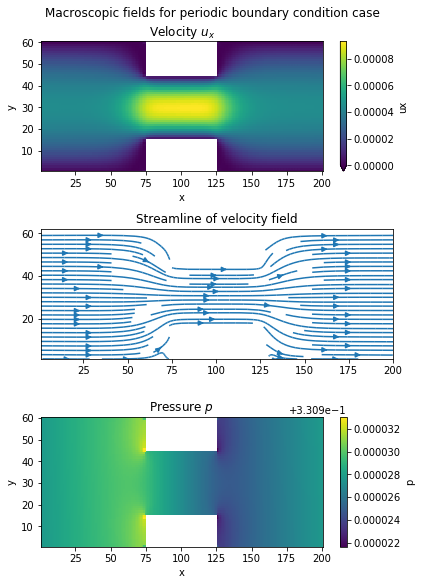

In [7]:
# put together
fig, axes = plt.subplots(3, 1, figsize=[6, 8])

ds_case1['ux'].plot(vmin=0, ax=axes[0])
axes[0].set_title('Velocity $u_x$')

axes[1].streamplot(ds_case1['x'].values, ds_case1['y'].values, 
                  ds_case1['ux'].values, ds_case1['uy'].values)
axes[1].set_title('Streamline of velocity field')

ds_case1['p'].plot(ax=axes[2])
axes[2].set_title('Pressure $p$')

fig.suptitle('Macroscopic fields for periodic boundary condition case', y=1.01)
fig.tight_layout()
fig.savefig('case1_2d_fields.png', dpi=200, bbox_inches = "tight")

### Velocity cross-section 1

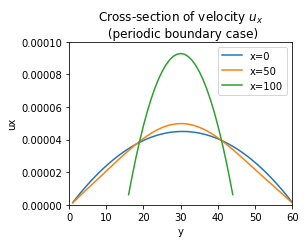

In [8]:
fig, ax = plt.subplots(1, 1, figsize=[4, 3])

ds_case1['ux'].isel(x=0).plot(ax=ax, label='x=0')
ds_case1['ux'].isel(x=50).plot(ax=ax, label='x=50')
ds_case1['ux'].isel(x=100).plot(ax=ax, label='x=100')
plt.legend()
ax.set_xlim(0, 60)
ax.set_ylim(0, 1e-4)
ax.set_title('Cross-section of velocity $u_x$ \n (periodic boundary case)')
fig.savefig('case1_u_cross_section.png', dpi=200, bbox_inches = "tight")

### The volume flow rate 1

In [9]:
ds_case1['ux'].sum(dim='y').mean()  # average over all cross sections

<xarray.DataArray 'ux' ()>
array(0.001797)

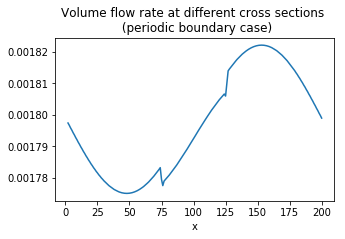

In [10]:
fig, ax = plt.subplots(1, 1, figsize=[5, 3])

# ds_case1['ux'].sum(dim='y').plot()  # too noisy
ds_case1['ux'].sum(dim='y').rolling(x=2).mean().plot()  # roughly constant
ax.set_title('Volume flow rate at different cross sections \n (periodic boundary case)')
fig.savefig('case1_volume_flow.png', dpi=200, bbox_inches = "tight")

### Average and maximum velocities 1

In [11]:
# velocity magnitude
ds_case1['v'] = (ds_case1['ux']**2+ds_case1['uy']**2)**0.5

In [12]:
ds_case1.mean()

<xarray.Dataset>
Dimensions:  ()
Data variables:
    ux       float64 3.45e-05
    uy       float64 -3.498e-08
    rho      float64 0.9928
    p        float64 0.3309
    v        float64 3.477e-05

In [13]:
ds_case1.max()

<xarray.Dataset>
Dimensions:  ()
Data variables:
    ux       float64 9.301e-05
    uy       float64 1.803e-05
    rho      float64 0.9928
    p        float64 0.3309
    v        float64 9.301e-05

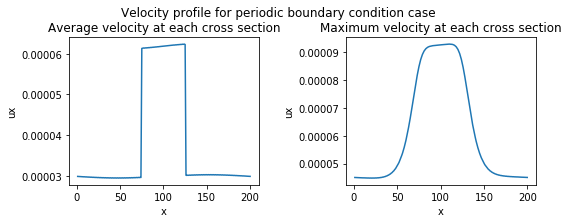

In [14]:
fig, axes = plt.subplots(1, 2, figsize=[8, 3])

ds_case1['ux'].mean(dim='y').plot.line(ax=axes[0])
axes[0].set_title('Average velocity at each cross section')

ds_case1['ux'].max(dim='y').plot.line(ax=axes[1])
axes[1].set_title('Maximum velocity at each cross section')

fig.suptitle('Velocity profile for periodic boundary condition case', y=1.02)
fig.tight_layout()
fig.savefig('case1_u_profile.png', dpi=200, bbox_inches = "tight")

## Case 2: imposed boundary

### Run simulation 2

In [15]:
!python ./lbm.py --case 2 --nt 8000

Arguments: Namespace(case=2, force=1e-08, nt=8000, omega=1.0, u_imposed=2.777777777777778e-05, wx=30)
Important parameters:
Boundary type: 2
Time steps: 8000
Narrowing width w: 30
Forcing: 0.0
Lelaxation omega: 1.0
viscosity:  0.16666666666666666

running solver... 

writing to file: lbm_bc2_w30_omega1.0_force0.0_nt8000.nc


### Read result 2

In [16]:
ds_case2 = xr.open_dataset('lbm_bc2_w30_omega1.0_force0.0_nt8000.nc')

In [17]:
# Reynolds number requires ux ~ 2.8e-5
ds_case2['ux'].isel(x=0).mean()

<xarray.DataArray 'ux' ()>
array(2.777778e-05)
Coordinates:
    x        float64 1.0

### Plot 2D fields 2

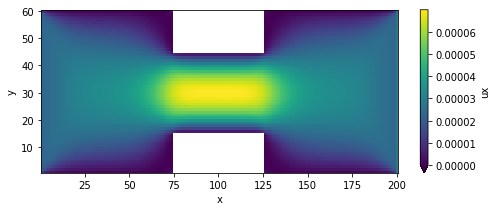

In [18]:
# steady state velocity
fig, ax = plt.subplots(1, 1, figsize=[8, 3])
ds_case2['ux'].plot(vmin=0,ax=ax)

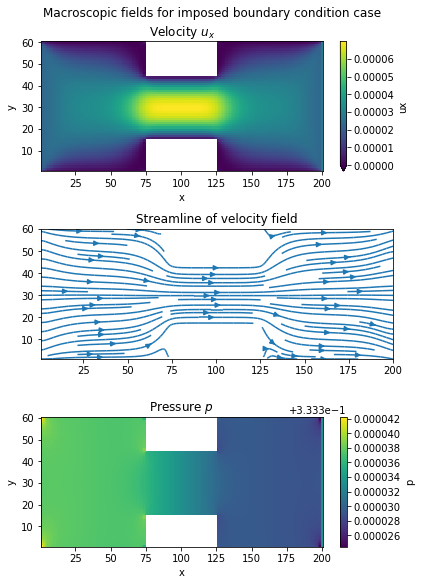

In [19]:
# put together
fig, axes = plt.subplots(3, 1, figsize=[6, 8])

ds_case2['ux'].plot(vmin=0, ax=axes[0])
axes[0].set_title('Velocity $u_x$')

axes[1].streamplot(ds_case2['x'].values, ds_case2['y'].values, 
                  ds_case2['ux'].values, ds_case2['uy'].values)
axes[1].set_title('Streamline of velocity field')

ds_case2['p'].plot(ax=axes[2])
axes[2].set_title('Pressure $p$')

fig.suptitle('Macroscopic fields for imposed boundary condition case', y=1.01)
fig.tight_layout()
fig.savefig('case2_2d_fields.png', dpi=200, bbox_inches = "tight")

### Velocity cross-section 2

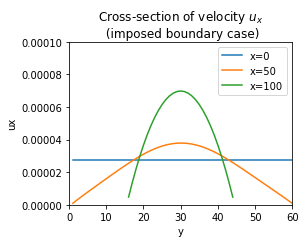

In [20]:
fig, ax = plt.subplots(1, 1, figsize=[4, 3])

ds_case2['ux'].isel(x=0).plot(ax=ax, label='x=0')
ds_case2['ux'].isel(x=50).plot(ax=ax, label='x=50')
ds_case2['ux'].isel(x=100).plot(ax=ax, label='x=100')
plt.legend()
ax.set_xlim(0, 60)
ax.set_ylim(0, 1e-4)
ax.set_title('Cross-section of velocity $u_x$ \n (imposed boundary case)')
fig.savefig('case2_u_cross_section.png', dpi=200, bbox_inches = "tight")

### The volume flow rate 2

In [21]:
ds_case2['ux'].sum(dim='y').mean()  # average over all cross sections

<xarray.DataArray 'ux' ()>
array(0.001358)

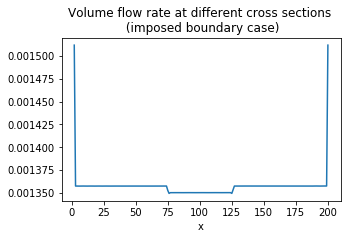

In [22]:
fig, ax = plt.subplots(1, 1, figsize=[5, 3])

#ds_case2['ux'].sum(dim='y').plot()  # too noisy
ds_case2['ux'].sum(dim='y').rolling(x=2).mean().plot()  # roughly constant
ax.set_title('Volume flow rate at different cross sections \n (imposed boundary case)')
fig.savefig('case2_volume_flow.png', dpi=200, bbox_inches = "tight")

### Average and maximum velocities 2

In [23]:
# velocity magnitude
ds_case2['v'] = (ds_case2['ux']**2+ds_case2['uy']**2)**0.5

In [24]:
ds_case2.mean()

<xarray.Dataset>
Dimensions:  ()
Data variables:
    ux       float64 2.608e-05
    uy       float64 -2.022e-11
    rho      float64 1.0
    p        float64 0.3333
    v        float64 2.635e-05

In [25]:
ds_case2.max()

<xarray.Dataset>
Dimensions:  ()
Data variables:
    ux       float64 6.981e-05
    uy       float64 1.341e-05
    rho      float64 1.0
    p        float64 0.3333
    v        float64 6.981e-05

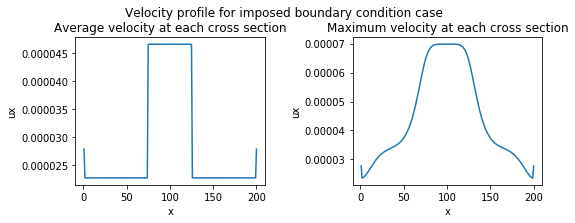

In [26]:
fig, axes = plt.subplots(1, 2, figsize=[8, 3])

ds_case2['ux'].mean(dim='y').plot.line(ax=axes[0])
axes[0].set_title('Average velocity at each cross section')

ds_case2['ux'].max(dim='y').plot.line(ax=axes[1])
axes[1].set_title('Maximum velocity at each cross section')

fig.suptitle('Velocity profile for imposed boundary condition case', y=1.02)
fig.tight_layout()
fig.savefig('case2_u_profile.png', dpi=200, bbox_inches = "tight")

# Varying the width of the narrowing w

## Case 1: periodic boundary ws

### Run simulation 1 ws

In [27]:
%%bash
# wx=30 is the default case already run
for wx in 10 20 40 50
do
    python ./lbm.py --case 1 --wx ${wx} --nt 8000
done

Arguments: Namespace(case=1, force=1e-08, nt=8000, omega=1.0, u_imposed=2.777777777777778e-05, wx=10)
Important parameters:
Boundary type: 1
Time steps: 8000
Narrowing width w: 10
Forcing: 1e-08
Lelaxation omega: 1.0
viscosity:  0.16666666666666666

running solver... 

writing to file: lbm_bc1_w10_omega1.0_force1e-08_nt8000.nc
Arguments: Namespace(case=1, force=1e-08, nt=8000, omega=1.0, u_imposed=2.777777777777778e-05, wx=20)
Important parameters:
Boundary type: 1
Time steps: 8000
Narrowing width w: 20
Forcing: 1e-08
Lelaxation omega: 1.0
viscosity:  0.16666666666666666

running solver... 

writing to file: lbm_bc1_w20_omega1.0_force1e-08_nt8000.nc
Arguments: Namespace(case=1, force=1e-08, nt=8000, omega=1.0, u_imposed=2.777777777777778e-05, wx=40)
Important parameters:
Boundary type: 1
Time steps: 8000
Narrowing width w: 40
Forcing: 1e-08
Lelaxation omega: 1.0
viscosity:  0.16666666666666666

running solver... 

writing to file: lbm_bc1_w40_omega1.0_force1e-08_nt8000.nc
Arguments: Na

In [28]:
!ls lbm_bc1_w*_omega1.0_force1e-08_nt8000.nc  # check all output files

lbm_bc1_w10_omega1.0_force1e-08_nt8000.nc
lbm_bc1_w20_omega1.0_force1e-08_nt8000.nc
lbm_bc1_w30_omega1.0_force1e-08_nt8000.nc
lbm_bc1_w40_omega1.0_force1e-08_nt8000.nc
lbm_bc1_w50_omega1.0_force1e-08_nt8000.nc


###  Plot results 1 ws

In [29]:
ds_case1_ws = xr.open_mfdataset('lbm_bc1_w*_omega1.0_force1e-08_nt8000.nc', concat_dim='width')
ds_case1_ws['width'] = [10, 20, 30, 40, 50]
ds_case1_ws

<xarray.Dataset>
Dimensions:  (width: 5, x: 200, y: 60)
Coordinates:
  * x        (x) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 ...
  * y        (y) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 ...
  * width    (width) int64 10 20 30 40 50
Data variables:
    ux       (width, y, x) float64 dask.array<shape=(5, 60, 200), chunksize=(1, 60, 200)>
    uy       (width, y, x) float64 dask.array<shape=(5, 60, 200), chunksize=(1, 60, 200)>
    rho      (width, y, x) float64 dask.array<shape=(5, 60, 200), chunksize=(1, 60, 200)>
    p        (width, y, x) float64 dask.array<shape=(5, 60, 200), chunksize=(1, 60, 200)>

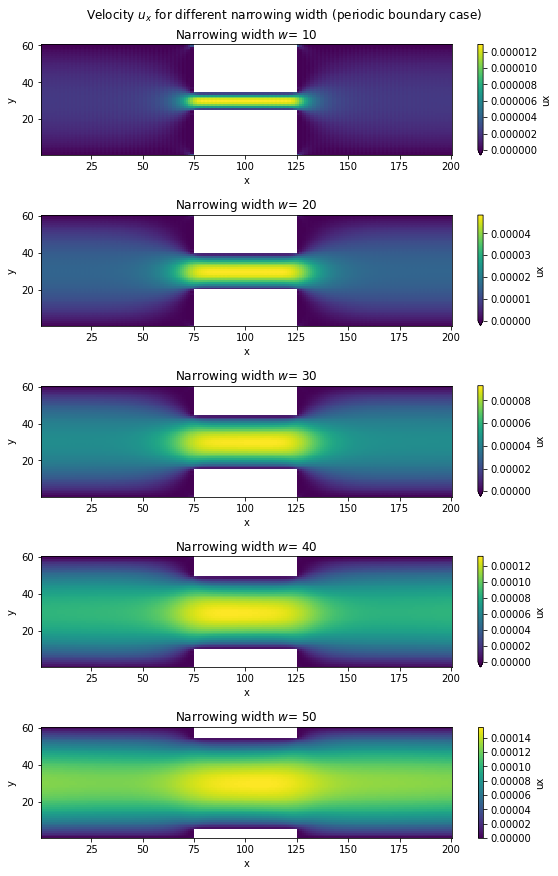

In [30]:
fig, axes = plt.subplots(5, 1, figsize=[8, 12])

for iw in range(5):
    ds_case1_ws['ux'].isel(width=iw).plot(vmin=0 ,ax=axes[iw])
    axes[iw].set_title('Narrowing width $w$= {0}'.format(ds_case1_ws['width'][iw].values))

fig.tight_layout()
fig.suptitle('Velocity $u_x$ for different narrowing width (periodic boundary case)', y=1.01)
fig.savefig('case1_ux_different_width.png', dpi=200, bbox_inches='tight')

### Volume flow rate 1 ws

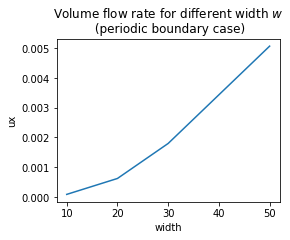

In [31]:
fig, ax = plt.subplots(1, 1, figsize=[4, 3])
ds_case1_ws['ux'].sum(dim='y').mean(dim='x').plot()

ax.set_title('Volume flow rate for different width $w$ \n (periodic boundary case)')
fig.savefig('case1_ws_volume_flow.png', dpi=200, bbox_inches = "tight")

## Case 2: imposed boundary ws

### Run simulation 2 ws

In [32]:
%%bash
# wx=30 is the default case already run
for wx in 10 20 40 50
do
    python ./lbm.py --case 2 --wx ${wx} --nt 8000
done

Arguments: Namespace(case=2, force=1e-08, nt=8000, omega=1.0, u_imposed=2.777777777777778e-05, wx=10)
Important parameters:
Boundary type: 2
Time steps: 8000
Narrowing width w: 10
Forcing: 0.0
Lelaxation omega: 1.0
viscosity:  0.16666666666666666

running solver... 

writing to file: lbm_bc2_w10_omega1.0_force0.0_nt8000.nc
Arguments: Namespace(case=2, force=1e-08, nt=8000, omega=1.0, u_imposed=2.777777777777778e-05, wx=20)
Important parameters:
Boundary type: 2
Time steps: 8000
Narrowing width w: 20
Forcing: 0.0
Lelaxation omega: 1.0
viscosity:  0.16666666666666666

running solver... 

writing to file: lbm_bc2_w20_omega1.0_force0.0_nt8000.nc
Arguments: Namespace(case=2, force=1e-08, nt=8000, omega=1.0, u_imposed=2.777777777777778e-05, wx=40)
Important parameters:
Boundary type: 2
Time steps: 8000
Narrowing width w: 40
Forcing: 0.0
Lelaxation omega: 1.0
viscosity:  0.16666666666666666

running solver... 

writing to file: lbm_bc2_w40_omega1.0_force0.0_nt8000.nc
Arguments: Namespace(case

In [33]:
!ls lbm_bc2_w*_omega1.0_force0.0_nt8000.nc  # check all output files

lbm_bc2_w10_omega1.0_force0.0_nt8000.nc lbm_bc2_w40_omega1.0_force0.0_nt8000.nc
lbm_bc2_w20_omega1.0_force0.0_nt8000.nc lbm_bc2_w50_omega1.0_force0.0_nt8000.nc
lbm_bc2_w30_omega1.0_force0.0_nt8000.nc


###  Plot results 2 ws

In [34]:
ds_case2_ws = xr.open_mfdataset('lbm_bc2_w*_omega1.0_force0.0_nt8000.nc', concat_dim='width')
ds_case2_ws

<xarray.Dataset>
Dimensions:  (width: 5, x: 200, y: 60)
Coordinates:
  * x        (x) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 ...
  * y        (y) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 ...
Dimensions without coordinates: width
Data variables:
    ux       (width, y, x) float64 dask.array<shape=(5, 60, 200), chunksize=(1, 60, 200)>
    uy       (width, y, x) float64 dask.array<shape=(5, 60, 200), chunksize=(1, 60, 200)>
    rho      (width, y, x) float64 dask.array<shape=(5, 60, 200), chunksize=(1, 60, 200)>
    p        (width, y, x) float64 dask.array<shape=(5, 60, 200), chunksize=(1, 60, 200)>

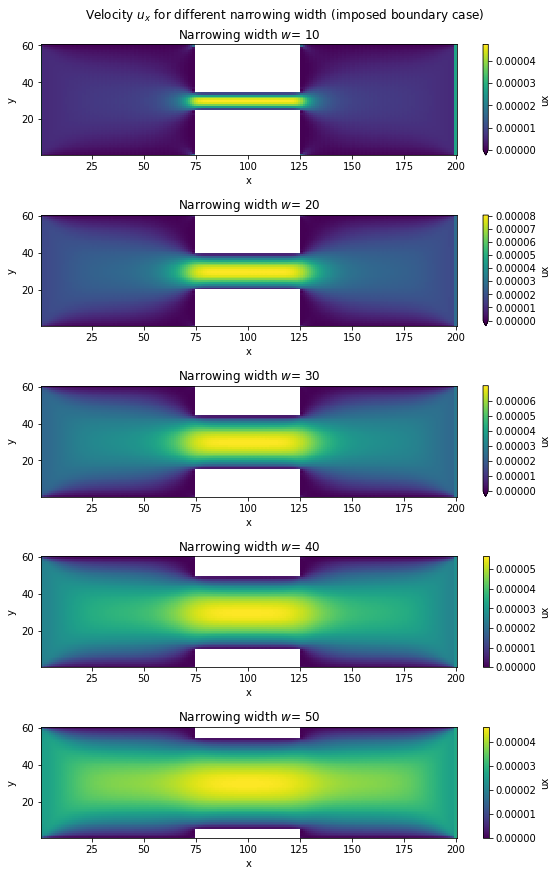

In [35]:
fig, axes = plt.subplots(5, 1, figsize=[8, 12])

for iw in range(5):
    ds_case2_ws['ux'].isel(width=iw).plot(vmin=0 ,ax=axes[iw])
    axes[iw].set_title('Narrowing width $w$= {0}'.format(ds_case1_ws['width'][iw].values))

fig.tight_layout()
fig.suptitle('Velocity $u_x$ for different narrowing width (imposed boundary case)', y=1.01)
fig.savefig('case2_ux_different_width.png', dpi=200, bbox_inches='tight')

### Volume flow rate 2 ws

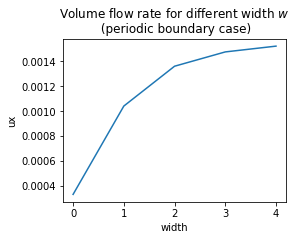

In [36]:
fig, ax = plt.subplots(1, 1, figsize=[4, 3])
ds_case2_ws['ux'].sum(dim='y').mean(dim='x').plot()

ax.set_title('Volume flow rate for different width $w$ \n (periodic boundary case)')
fig.savefig('case2_ws_volume_flow.png', dpi=200, bbox_inches = "tight")

# Bernoulli estimate

## Defaut case

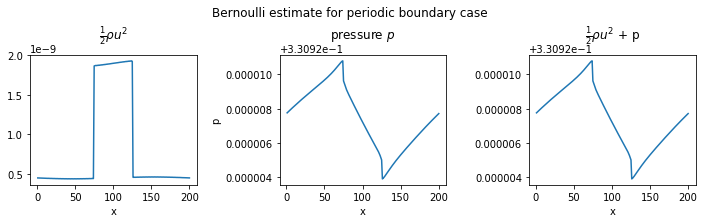

In [37]:
ds_ym = ds_case1.mean(dim='y')

dr_vp = 0.5 * ds_ym['rho'] * ds_ym['ux']**2  # effective pressure from velocity 
ber = dr_vp + ds_ym['p']  # this quantity should be conserved


fig, axes = plt.subplots(1, 3, figsize=[10, 3])

dr_vp.plot(ax=axes[0])
axes[0].set_title(r'$\frac{1}{2} \rho u^2$', y=1.08)

ds_ym['p'].plot(ax=axes[1])
axes[1].set_title('pressure $p$', y=1.08)

ber.plot(ax=axes[2])
axes[2].set_title(r'$\frac{1}{2} \rho u^2$ + p', y=1.08)

fig.suptitle('Bernoulli estimate for periodic boundary case', y=1.02)

fig.tight_layout()
fig.savefig('bernoulli_case1_default.png', dpi=200, bbox_inches = "tight")

In [38]:
(ds_ym['p'].max() - ds_ym['p'].min())/ds_ym['p'].min()  # only 0.002% perturbation

<xarray.DataArray 'p' ()>
array(2.088568e-05)

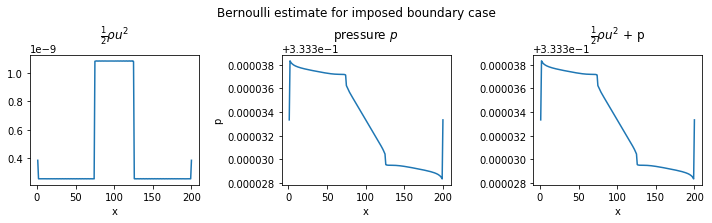

In [39]:
ds_ym = ds_case2.mean(dim='y')

dr_vp = 0.5 * ds_ym['rho'] * ds_ym['ux']**2  # effective pressure from velocity 
ber = dr_vp + ds_ym['p']  # this quantity should be conserved


fig, axes = plt.subplots(1, 3, figsize=[10, 3])

dr_vp.plot(ax=axes[0])
axes[0].set_title(r'$\frac{1}{2} \rho u^2$', y=1.08)

ds_ym['p'].plot(ax=axes[1])
axes[1].set_title('pressure $p$', y=1.08)

ber.plot(ax=axes[2])
axes[2].set_title(r'$\frac{1}{2} \rho u^2$ + p', y=1.08)

fig.suptitle('Bernoulli estimate for imposed boundary case', y=1.02)

fig.tight_layout()
fig.savefig('bernoulli_case2_default.png', dpi=200, bbox_inches = "tight")

## Varying the LBM kinematic viscosity

### Run simulation 1 omegas

In [40]:
%%bash
# omega=1.0 is the default case already run
for omega in 1.1 1.2 1.3 1.4 1.54
do
    python ./lbm.py --case 1 --omega ${omega} --nt 8000
done

Arguments: Namespace(case=1, force=1e-08, nt=8000, omega=1.1, u_imposed=2.777777777777778e-05, wx=30)
Important parameters:
Boundary type: 1
Time steps: 8000
Narrowing width w: 30
Forcing: 1e-08
Lelaxation omega: 1.1
viscosity:  0.13636363636363635

running solver... 

writing to file: lbm_bc1_w30_omega1.1_force1e-08_nt8000.nc
Arguments: Namespace(case=1, force=1e-08, nt=8000, omega=1.2, u_imposed=2.777777777777778e-05, wx=30)
Important parameters:
Boundary type: 1
Time steps: 8000
Narrowing width w: 30
Forcing: 1e-08
Lelaxation omega: 1.2
viscosity:  0.11111111111111112

running solver... 

writing to file: lbm_bc1_w30_omega1.2_force1e-08_nt8000.nc
Arguments: Namespace(case=1, force=1e-08, nt=8000, omega=1.3, u_imposed=2.777777777777778e-05, wx=30)
Important parameters:
Boundary type: 1
Time steps: 8000
Narrowing width w: 30
Forcing: 1e-08
Lelaxation omega: 1.3
viscosity:  0.08974358974358972

running solver... 

writing to file: lbm_bc1_w30_omega1.3_force1e-08_nt8000.nc
Arguments: Na

In [41]:
!ls lbm_bc1_w30_omega*_force1e-08_nt8000.nc

lbm_bc1_w30_omega1.0_force1e-08_nt8000.nc
lbm_bc1_w30_omega1.1_force1e-08_nt8000.nc
lbm_bc1_w30_omega1.2_force1e-08_nt8000.nc
lbm_bc1_w30_omega1.3_force1e-08_nt8000.nc
lbm_bc1_w30_omega1.4_force1e-08_nt8000.nc
lbm_bc1_w30_omega1.54_force1e-08_nt8000.nc


### Plot results 1 nus

In [42]:
omegas = np.array([1.0, 1.1, 1.2, 1.3, 1.4, 1.54])
nus = 1/3 * (1/omegas - 0.5)
nus

array([0.16666667, 0.13636364, 0.11111111, 0.08974359, 0.07142857,
       0.04978355])

In [43]:
ds_case1_nus = xr.open_mfdataset('lbm_bc1_w30_omega*_force1e-08_nt8000.nc', concat_dim=r'$\nu$')

ds_case1_nus[r'$\nu$'] = nus
ds_case1_nus

<xarray.Dataset>
Dimensions:  ($\nu$: 6, x: 200, y: 60)
Coordinates:
  * x        (x) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 ...
  * y        (y) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 ...
  * $\nu$    ($\nu$) float64 0.1667 0.1364 0.1111 0.08974 0.07143 0.04978
Data variables:
    ux       ($\nu$, y, x) float64 dask.array<shape=(6, 60, 200), chunksize=(1, 60, 200)>
    uy       ($\nu$, y, x) float64 dask.array<shape=(6, 60, 200), chunksize=(1, 60, 200)>
    rho      ($\nu$, y, x) float64 dask.array<shape=(6, 60, 200), chunksize=(1, 60, 200)>
    p        ($\nu$, y, x) float64 dask.array<shape=(6, 60, 200), chunksize=(1, 60, 200)>

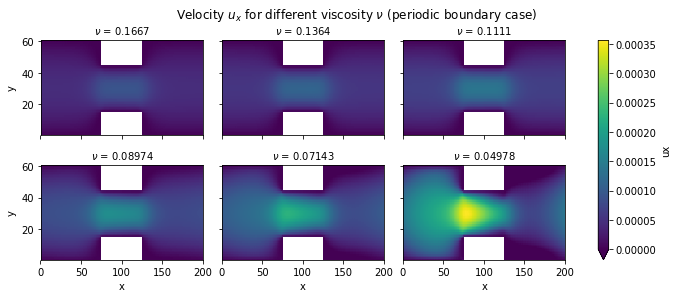

In [44]:
ds_case1_nus['ux'].plot(col=r'$\nu$', col_wrap=3, vmin=0, figsize=[10, 4])
plt.suptitle(r'Velocity $u_x$ for different viscosity $\nu$ (periodic boundary case)', y=1.025)
plt.savefig('u_case1_nus.png', dpi=200, bbox_inches = "tight")

### Bernoulli values nus

In [45]:
ds_ym_nus = ds_case1_nus.mean(dim='y')

dr_vp_nus = 0.5 * ds_ym_nus['rho'] * ds_ym_nus['ux']**2  # effective pressure from velocity 
ber_nus = dr_vp + ds_ym_nus['p']  # this quantity should be conserved

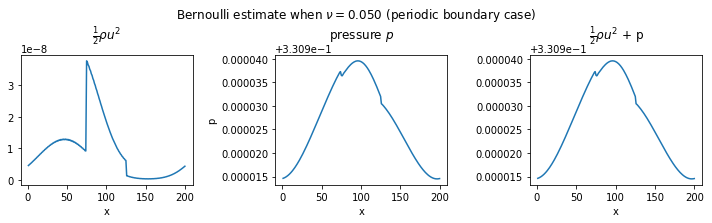

In [46]:
inu = 5

fig, axes = plt.subplots(1, 3, figsize=[10, 3])

dr_vp_nus[inu].plot(ax=axes[0])
axes[0].set_title(r'$\frac{1}{2} \rho u^2$', y=1.08)

ds_ym_nus['p'][inu].plot(ax=axes[1])
axes[1].set_title('pressure $p$', y=1.08)

ber_nus[:,inu].plot(ax=axes[2])
axes[2].set_title(r'$\frac{1}{2} \rho u^2$ + p', y=1.08)

fig.suptitle(r'Bernoulli estimate when $\nu={:.3f}$ (periodic boundary case)'.format(nus[inu]), y=1.02)

fig.tight_layout()

plt.savefig('bernoulli_case1_nu_small.png', dpi=200, bbox_inches = "tight")

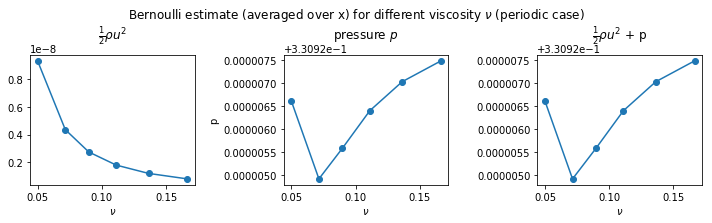

In [47]:
fig, axes = plt.subplots(1, 3, figsize=[10, 3])

dr_vp_nus.mean(dim='x').plot(ax=axes[0], marker='o')
axes[0].set_title(r'$\frac{1}{2} \rho u^2$', y=1.08)

ds_ym_nus['p'].mean(dim='x').plot(ax=axes[1], marker='o')
axes[1].set_title('pressure $p$', y=1.08)

ber_nus.mean(dim='x').plot(ax=axes[2], marker='o')
axes[2].set_title(r'$\frac{1}{2} \rho u^2$ + p', y=1.08)

fig.suptitle(r'Bernoulli estimate (averaged over x) for different viscosity $\nu$ (periodic case)', y=1.02)

fig.tight_layout()

plt.savefig('bernoulli_case1_nus.png', dpi=200, bbox_inches = "tight")